In [73]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [74]:
!git clone https://github.com/yatin9988/Convolutional-Neural-Network.git

Cloning into 'Convolutional-Neural-Network'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 958 (delta 2), reused 15 (delta 2), pack-reused 942
Receiving objects: 100% (958/958), 190.04 MiB | 41.37 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Checking out files: 100% (1034/1034), done.


In [75]:
train_generator = ImageDataGenerator(rescale=1/255)
validation_generator = ImageDataGenerator(rescale=1/255)

In [76]:
training_data = train_generator.flow_from_directory('Convolutional-Neural-Network/Pokemon_images/Train/',target_size=(100,100),class_mode='categorical',batch_size=32)
validation_data = validation_generator.flow_from_directory('Convolutional-Neural-Network/Pokemon_images/Valid/',target_size=(100,100),class_mode='categorical',batch_size=32)

Found 888 images belonging to 5 classes.
Found 75 images belonging to 5 classes.


In [77]:
training_data.class_indices

{'Bulbasaur': 0, 'Charizard': 1, 'Charmander': 2, 'Dragonair': 3, 'Pikachu': 4}

In [78]:
validation_data.class_indices

{'Bulbasaur': 0, 'Charizard': 1, 'Charmander': 2, 'Dragonair': 3, 'Pikachu': 4}

In [79]:
for count,(x,y) in enumerate(training_data):
  print(x.shape,y.shape)
  if count == 4:
    break 

(32, 100, 100, 3) (32, 5)
(32, 100, 100, 3) (32, 5)
(32, 100, 100, 3) (32, 5)
(32, 100, 100, 3) (32, 5)
(32, 100, 100, 3) (32, 5)


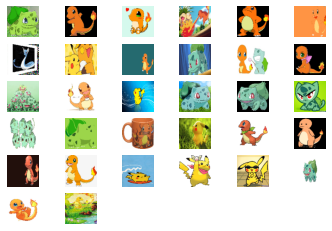

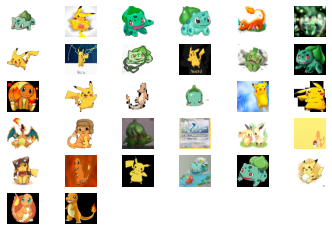

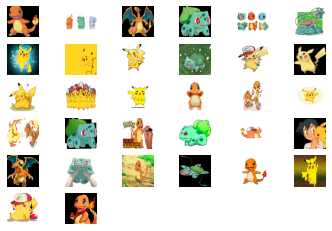

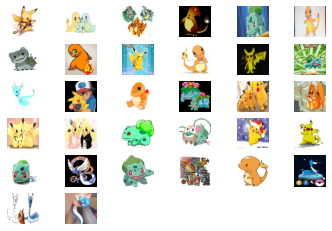

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


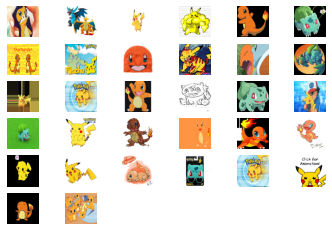

In [80]:
for count,(x,y) in enumerate(training_data):
  for i in range(x.shape[0]):
    plt.subplot(6,6,i+1)
    plt.imshow(x[i])
    plt.axis("off")
  plt.show()
  if count == 4:
    break  

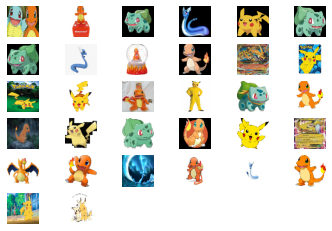

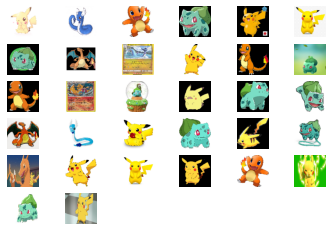

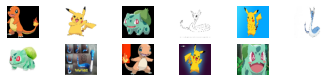

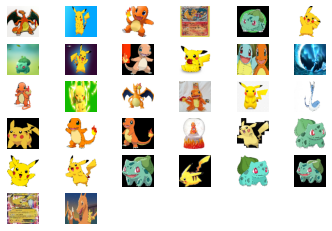

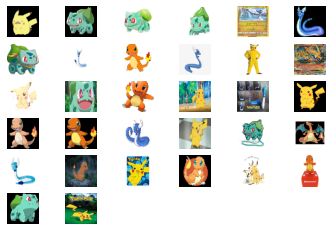

In [81]:
for count,(x,y) in enumerate(validation_data):
  for i in range(x.shape[0]):
    plt.subplot(6,6,i+1)
    plt.imshow(x[i])
    plt.axis("off")
  plt.show()

  if count == 4:
    break  

In [82]:
## model architecture

In [83]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(64,activation='relu'))
model.add(Dense(5,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 128)        

In [84]:
model_check_point = ModelCheckpoint('model.h5',monitor='val_accuracy',verbose=1,save_best_only=True)
early_check_point = EarlyStopping(monitor='val_accuracy',min_delta=0.5,patience=10,verbose=1,restore_best_weights=True)

In [85]:
call_backs = [model_check_point,early_check_point]

In [86]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [87]:
hist = model.fit_generator(training_data,steps_per_epoch=27,epochs=7,validation_data=validation_data,validation_steps=2)

Epoch 1/7
13/27 [=============>................] - ETA: 8s - loss: 1.3368 - accuracy: 0.3630

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


27/27 [==============================] - 19s 698ms/step - loss: 1.1155 - accuracy: 0.4790 - val_loss: 1.0655 - val_accuracy: 0.4688
Epoch 2/7
27/27 [==============================] - 18s 679ms/step - loss: 0.7634 - accuracy: 0.6787 - val_loss: 0.5226 - val_accuracy: 0.7812
Epoch 3/7
27/27 [==============================] - 18s 677ms/step - loss: 0.4929 - accuracy: 0.8259 - val_loss: 0.3587 - val_accuracy: 0.9062
Epoch 4/7
27/27 [==============================] - 19s 698ms/step - loss: 0.4287 - accuracy: 0.8668 - val_loss: 0.5706 - val_accuracy: 0.8906
Epoch 5/7
27/27 [==============================] - 18s 670ms/step - loss: 0.4124 - accuracy: 0.8750 - val_loss: 0.4106 - val_accuracy: 0.8906
Epoch 6/7
27/27 [==============================] - 18s 663ms/step - loss: 0.4085 - accuracy: 0.8773 - val_loss: 0.3894 - val_accuracy: 0.8906
Epoch 7/7
27/27 [==============================] - 18s 662ms/step - loss: 0.3532 - accuracy: 0.8820 - val_loss: 0.4919 - val_accuracy: 0.8750


In [88]:
test_generator = ImageDataGenerator(rescale=1/255)
testing_data = test_generator.flow_from_directory('Convolutional-Neural-Network/Pokemon_images/Test/',target_size=(100,100),class_mode='categorical',batch_size=32)

Found 34 images belonging to 5 classes.


In [89]:
prob = model.predict_generator(testing_data)

In [90]:
print(prob)

[[5.61301968e-05 4.87550627e-04 1.89222489e-02 3.54545728e-06
  9.80530500e-01]
 [4.96225567e-08 3.83696829e-07 1.89643353e-04 2.76091844e-10
  9.99809921e-01]
 [2.53402366e-04 5.25443116e-03 6.41200364e-01 2.45779265e-05
  3.53267133e-01]
 [4.35134359e-02 5.96104153e-02 1.52454129e-03 8.73522699e-01
  2.18289867e-02]
 [1.44657417e-06 1.96686340e-03 9.97955918e-01 3.34932406e-06
  7.25073332e-05]
 [2.69642565e-03 8.44028071e-02 8.89335752e-01 4.52785846e-03
  1.90371703e-02]
 [4.21996083e-06 3.52989184e-03 9.96418834e-01 1.70474941e-05
  2.99476869e-05]
 [4.26018551e-06 2.98347368e-05 4.27679485e-03 8.90041179e-08
  9.95688975e-01]
 [1.23601511e-01 1.75807983e-01 6.54290915e-02 5.79458356e-01
  5.57029732e-02]
 [7.79341135e-05 1.02696451e-03 2.97321891e-03 4.43852559e-06
  9.95917499e-01]
 [9.25364569e-02 1.41712606e-01 1.38313575e-02 7.12411344e-01
  3.95081863e-02]
 [3.26691443e-05 9.65936296e-03 7.54774272e-01 8.47747833e-06
  2.35525191e-01]
 [3.31079721e-01 1.26180649e-01 8.958724

In [91]:
accuracy = model.evaluate_generator(testing_data)

In [92]:
print(accuracy)

[0.8715256452560425, 0.7647058963775635]
